<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2026-01-01 17:43:54--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite’

survey-results-publ 100%[===================>] 201.62M  71.9MB/s    in 2.8s    

2026-01-01 17:43:58 (71.9 MB/s) - ‘survey-results-public.sqlite’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [2]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 162.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 181.9 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 144.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 154.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 97.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 114.6 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [5]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [6]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [7]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


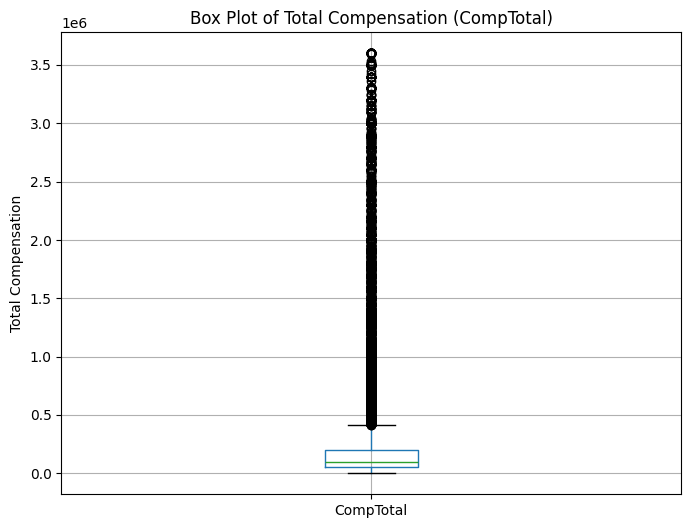

In [32]:
# Box Plot of Total Compensation (CompTotal) - Clean Version

# SQL query to retrieve total compensation data
QUERY = """
SELECT CompTotal
FROM main
WHERE CompTotal IS NOT NULL
"""

# Load data into a DataFrame
df_comp = pd.read_sql_query(QUERY, conn)

# Convert CompTotal to numeric values
df_comp['CompTotal'] = pd.to_numeric(df_comp['CompTotal'], errors='coerce')

# Drop missing values
df_comp = df_comp.dropna()

# Optional: remove extreme outliers above the 95th percentile
upper_limit = df_comp['CompTotal'].quantile(0.95)
df_comp_filtered = df_comp[df_comp['CompTotal'] <= upper_limit]

# Create the simple box plot
plt.figure(figsize=(8,6))
df_comp_filtered.boxplot(column='CompTotal')
plt.title('Box Plot of Total Compensation (CompTotal)')
plt.ylabel('Total Compensation')
plt.show()


**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


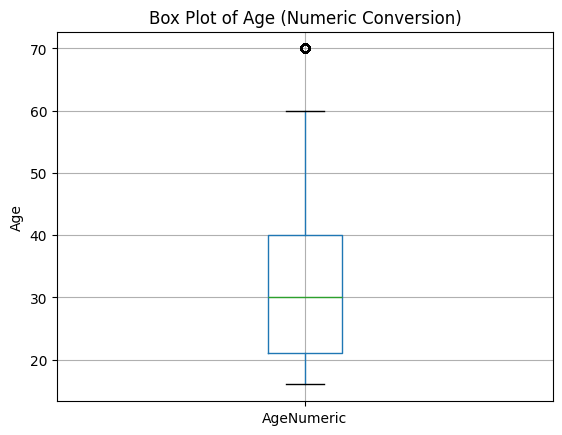

In [11]:
# your code goes here
# SQL query to retrieve Age data
QUERY = """
SELECT Age
FROM main
WHERE Age IS NOT NULL
"""
df_age = pd.read_sql_query(QUERY, conn)

# Map age ranges to numeric midpoint values
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

df_age['AgeNumeric'] = df_age['Age'].map(age_mapping)

# Drop rows that could not be converted
df_age = df_age.dropna()

# Create the box plot
plt.figure()
df_age.boxplot(column='AgeNumeric')
plt.title('Box Plot of Age (Numeric Conversion)')
plt.ylabel('Age')
plt.show()


### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


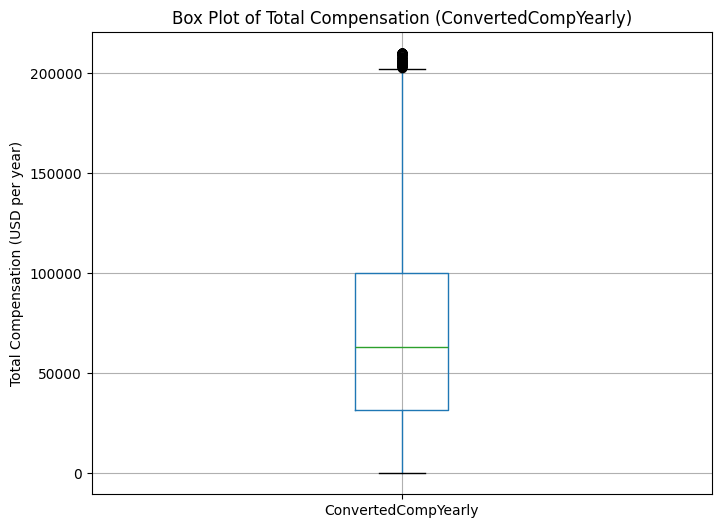

In [29]:
# Task 1: Box Plot of Total Compensation (ConvertedCompYearly) - Clean Version

# SQL query to retrieve yearly compensation
QUERY = """
SELECT ConvertedCompYearly
FROM main
WHERE ConvertedCompYearly IS NOT NULL
"""
df_comp = pd.read_sql_query(QUERY, conn)

# Convert to numeric just in case
df_comp['ConvertedCompYearly'] = pd.to_numeric(df_comp['ConvertedCompYearly'], errors='coerce')

# Drop missing values
df_comp = df_comp.dropna()

# Optional: remove extreme outliers above 95th percentile
upper_limit = df_comp['ConvertedCompYearly'].quantile(0.95)
df_comp_filtered = df_comp[df_comp['ConvertedCompYearly'] <= upper_limit]

# Create the simple box plot
plt.figure(figsize=(8,6))
df_comp_filtered.boxplot(column='ConvertedCompYearly')
plt.title('Box Plot of Total Compensation (ConvertedCompYearly)')
plt.ylabel('Total Compensation (USD per year)')
plt.show()


**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


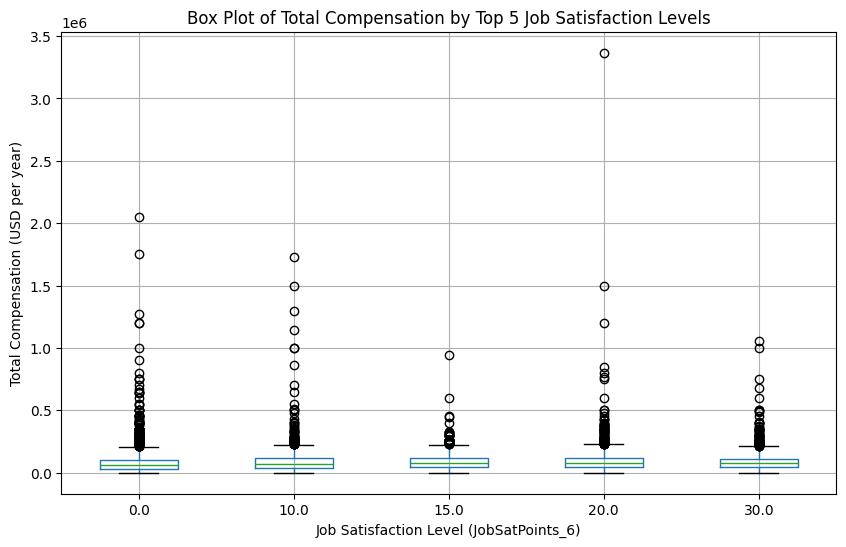

In [28]:
# Box Plot of ConvertedCompYearly grouped by top 5 Job Satisfaction levels

# SQL query to get Job Satisfaction counts
QUERY = """
SELECT JobSatPoints_6, COUNT(*) as count
FROM main
WHERE JobSatPoints_6 IS NOT NULL
GROUP BY JobSatPoints_6
ORDER BY count DESC
LIMIT 5
"""
top5_df = pd.read_sql_query(QUERY, conn)
top5_levels = top5_df['JobSatPoints_6'].tolist()

# Get compensation data for top 5 levels
QUERY = f"""
SELECT JobSatPoints_6, ConvertedCompYearly
FROM main
WHERE JobSatPoints_6 IN ({','.join(['?']*len(top5_levels))})
  AND ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn, params=top5_levels)

# Convert to numeric and drop missing
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df = df.dropna()

# Pivot for pandas boxplot
df_pivot = df.pivot(columns='JobSatPoints_6', values='ConvertedCompYearly')

# Create the box plot
plt.figure(figsize=(10,6))
df_pivot.boxplot()
plt.title('Box Plot of Total Compensation by Top 5 Job Satisfaction Levels')
plt.xlabel('Job Satisfaction Level (JobSatPoints_6)')
plt.ylabel('Total Compensation (USD per year)')
plt.show()


### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


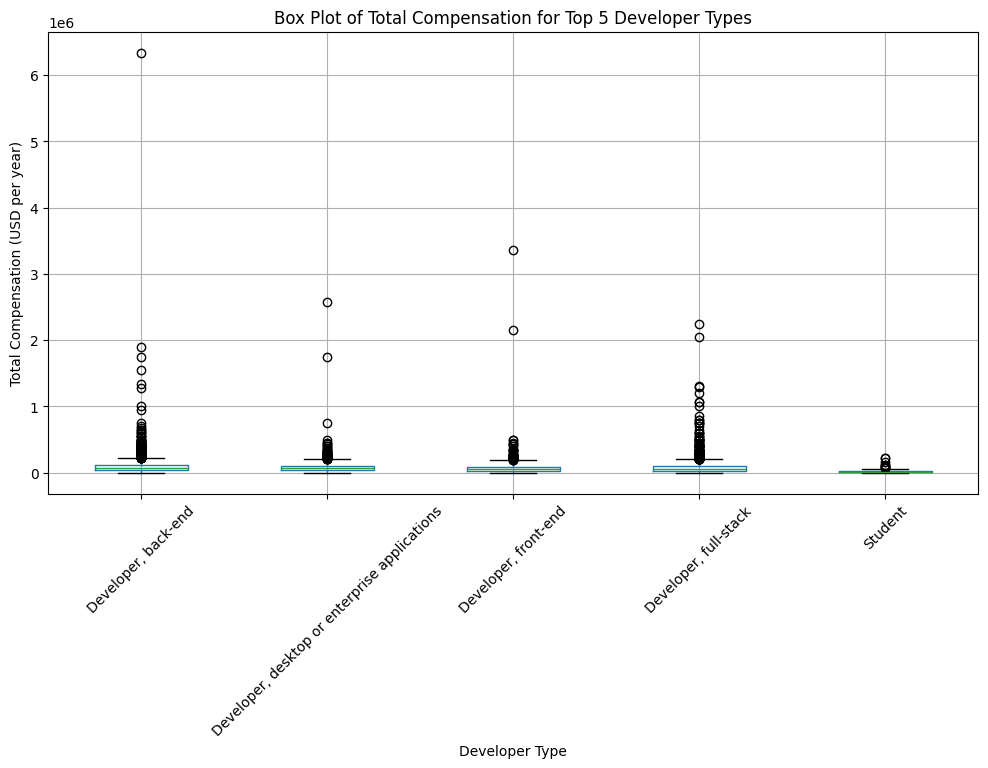

In [23]:
# your code goes here
# Task 3: Box Plot of ConvertedCompYearly for Top 5 Developer Types

# Step 1: Get the top 5 most common developer types
QUERY = """
SELECT DevType, COUNT(*) as count
FROM main
WHERE DevType IS NOT NULL
GROUP BY DevType
ORDER BY count DESC
LIMIT 5
"""
top5_df = pd.read_sql_query(QUERY, conn)
top5_devtypes = top5_df['DevType'].tolist()

# Step 2: Get compensation data for these top 5 developer types
QUERY = f"""
SELECT DevType, ConvertedCompYearly
FROM main
WHERE DevType IN ({','.join(['?']*len(top5_devtypes))})
  AND ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn, params=top5_devtypes)

# Step 3: Convert compensation to numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Step 4: Drop missing values
df = df.dropna()

# Step 5: Pivot data for boxplot (each DevType becomes a column)
df_pivot = df.pivot(columns='DevType', values='ConvertedCompYearly')

# Step 6: Create the box plot
plt.figure(figsize=(12,6))
df_pivot.boxplot()
plt.title('Box Plot of Total Compensation for Top 5 Developer Types')
plt.xlabel('Developer Type')
plt.ylabel('Total Compensation (USD per year)')
plt.xticks(rotation=45)
plt.show()


**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


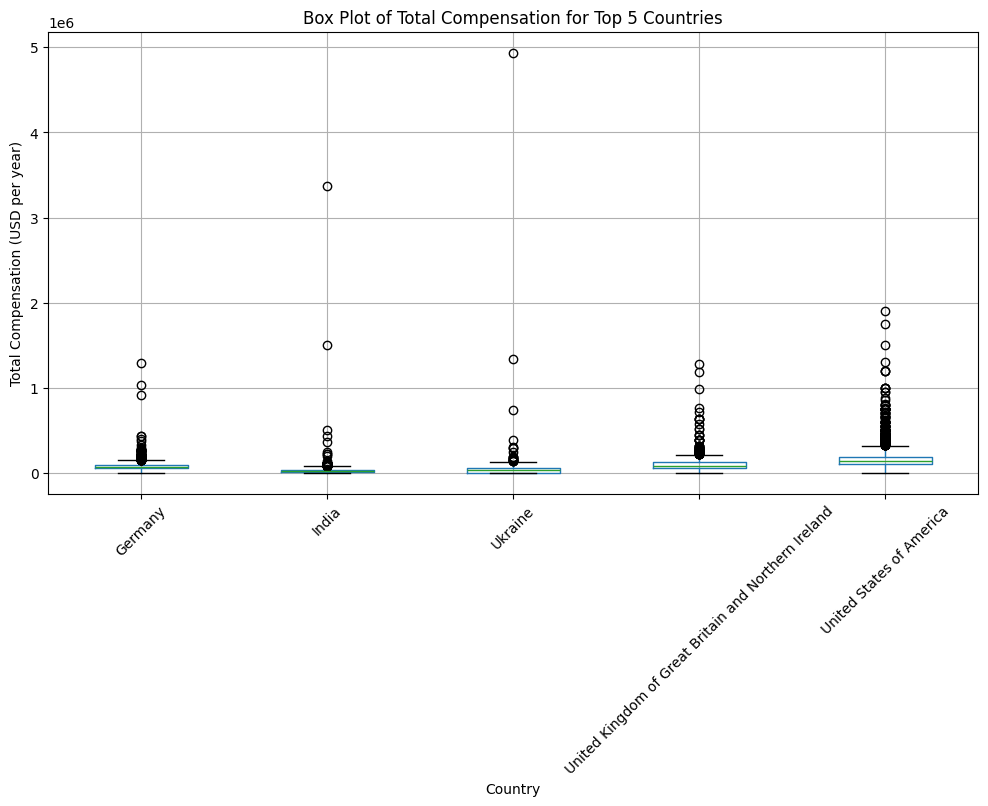

In [24]:
# your code goes here
# Task 3: Box Plot of ConvertedCompYearly for Top 5 Countries

# Step 1: Get the top 5 countries by respondent count
QUERY = """
SELECT Country, COUNT(*) as count
FROM main
WHERE Country IS NOT NULL
GROUP BY Country
ORDER BY count DESC
LIMIT 5
"""
top5_df = pd.read_sql_query(QUERY, conn)
top5_countries = top5_df['Country'].tolist()

# Step 2: Get compensation data for these top 5 countries
QUERY = f"""
SELECT Country, ConvertedCompYearly
FROM main
WHERE Country IN ({','.join(['?']*len(top5_countries))})
  AND ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn, params=top5_countries)

# Step 3: Convert compensation to numeric
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')

# Step 4: Drop missing values
df = df.dropna()

# Step 5: Pivot data for boxplot (each Country becomes a column)
df_pivot = df.pivot(columns='Country', values='ConvertedCompYearly')

# Step 6: Create the box plot
plt.figure(figsize=(12,6))
df_pivot.boxplot()
plt.title('Box Plot of Total Compensation for Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Total Compensation (USD per year)')
plt.xticks(rotation=45)
plt.show()


### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


<Figure size 1000x600 with 0 Axes>

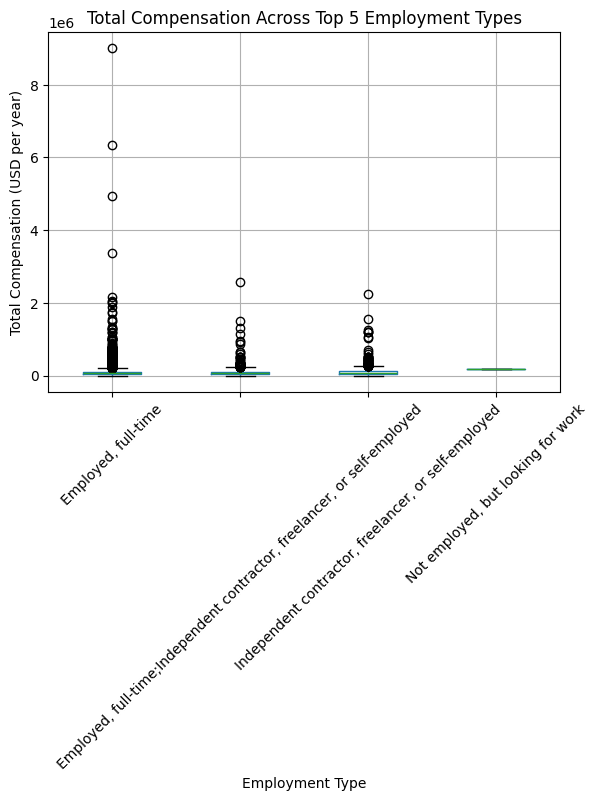

In [27]:
# Task 4: Box Plot of ConvertedCompYearly for Top 5 Employment Types

# Step 1: Get top 5 employment types
QUERY = """
SELECT Employment, COUNT(*) as count
FROM main
WHERE Employment IS NOT NULL
GROUP BY Employment
ORDER BY count DESC
LIMIT 5
"""
top5_df = pd.read_sql_query(QUERY, conn)
top5_employment = top5_df['Employment'].tolist()

# Step 2: Get compensation data for these top 5 types
QUERY = f"""
SELECT Employment, ConvertedCompYearly
FROM main
WHERE Employment IN ({','.join(['?']*len(top5_employment))})
  AND ConvertedCompYearly IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn, params=top5_employment)

# Step 3: Convert to numeric and drop missing
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df = df.dropna()

# Step 4: Simple pandas boxplot
plt.figure(figsize=(10,6))
df.boxplot(column='ConvertedCompYearly', by='Employment')
plt.title('Total Compensation Across Top 5 Employment Types')
plt.suptitle('')
plt.xlabel('Employment Type')
plt.ylabel('Total Compensation (USD per year)')
plt.xticks(rotation=45)
plt.show()


**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


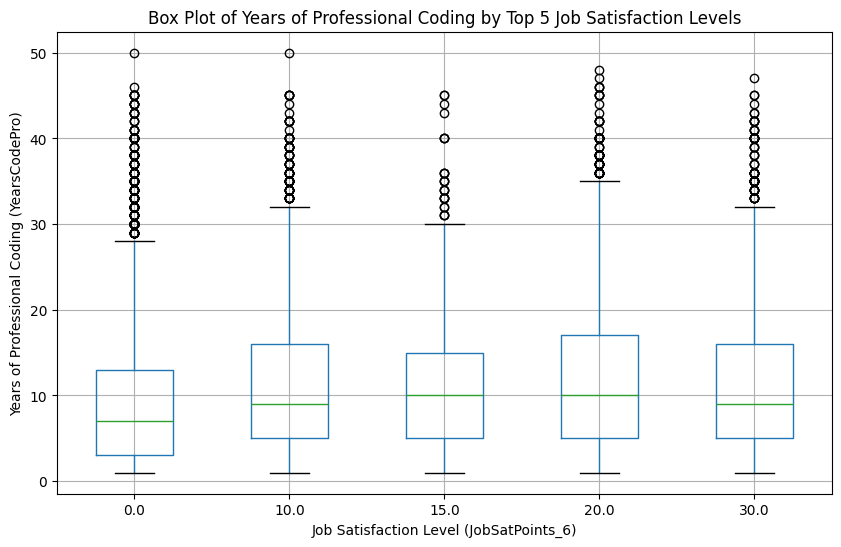

In [33]:
# Box Plot of YearsCodePro by Top 5 Job Satisfaction Levels

# Step 1: Get top 5 JobSatPoints_6 levels
QUERY = """
SELECT JobSatPoints_6, COUNT(*) as count
FROM main
WHERE JobSatPoints_6 IS NOT NULL
GROUP BY JobSatPoints_6
ORDER BY count DESC
LIMIT 5
"""
top5_df = pd.read_sql_query(QUERY, conn)
top5_levels = top5_df['JobSatPoints_6'].tolist()

# Step 2: Get YearsCodePro for these top 5 levels
QUERY = f"""
SELECT JobSatPoints_6, YearsCodePro
FROM main
WHERE JobSatPoints_6 IN ({','.join(['?']*len(top5_levels))})
  AND YearsCodePro IS NOT NULL
"""
df = pd.read_sql_query(QUERY, conn, params=top5_levels)

# Step 3: Convert YearsCodePro and JobSatPoints_6 to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSatPoints_6'] = pd.to_numeric(df['JobSatPoints_6'], errors='coerce')

# Drop missing values
df = df.dropna()

# Step 4: Pivot for boxplot (each JobSatPoints_6 level becomes a column)
df_pivot = df.pivot(columns='JobSatPoints_6', values='YearsCodePro')

# Step 5: Create the box plot
plt.figure(figsize=(10,6))
df_pivot.boxplot()
plt.title('Box Plot of Years of Professional Coding by Top 5 Job Satisfaction Levels')
plt.xlabel('Job Satisfaction Level (JobSatPoints_6)')
plt.ylabel('Years of Professional Coding (YearsCodePro)')
plt.show()


### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [34]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
